# Proyecto I 
* Monica Alfaro Parrales
* Adrián Ramírez Mattey
* Gilberth Rodríguez Mejías 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.utils import shuffle
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

## Carga del dataset "Pima Indians Diabetes Database"

In [ ]:
data = pd.read_csv('diabetes.csv')
print("data head")
display(data.head())
print("data describe")
display(data.describe())
display(data)

X = data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y = data['Outcome']

### Análisis de datos
1 = Diabetes

0 = No diabetes

### Gráficos de dispersión 

In [ ]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()


### Histogramas

In [ ]:
# Contar la cantidad de datos con Outcome 1 y 0
outcome_counts = data['Outcome'].value_counts()

# Crear el histograma
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'green'])
plt.xlabel('Outcome')
plt.ylabel('Cantidad de datos')
plt.title('Cantidad de datos por tipo de Outcome')
plt.xticks([0, 1], ['Outcome 0', 'Outcome 1'])
plt.show()

In [ ]:
dataGroup = data.groupby('Outcome')
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Pregnancies'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Pregnancies'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Glucose'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Glucose'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Insulin'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Insulin'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Insulina')
plt.xlabel('Insulina')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['BMI'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['BMI'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - BMI')
plt.xlabel('BMI')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Age'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Age'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Edad')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

## Eliminación de outliers y división del dataset
Se procede a hacer uso de IQR, el rango intercuartil (IQR) es la diferencia entre el percentil 75 y el 25 de los datos. Es una medida de dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a valores atípicos. Posteriormente, se hace un shuffle de la data para asegurar una mayor distribución y se divide el dataset en un 80% training y 20% testing. 

In [ ]:
# Calcula el IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifica los outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Encuentra las filas que tienen al menos un outlier
outliers_indices = outliers.any(axis=1)

# Muestra las filas con outliers
print("Filas con outliers:")
display(data[outliers_indices])

# Elimina los outliers
data_sin_outliers = data[~outliers_indices]

# Muestra el conjunto de datos sin outliers
print("Data sin outliers:")
display(data_sin_outliers)

# Estadísticas del conjunto de datos sin outliers
print("Data sin outliers")
display(data_sin_outliers.describe())

### Gráficos de dispersión posterior a eliminación de outliers

In [ ]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos (no outliers)")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa (no outliers)")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()


In [ ]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial (no outliers)")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()


In [ ]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel (no outliers)")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina (no outliers)")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data_sin_outliers)

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI (no outliers)")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree (no outliers)")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()

### Actualizacion de datos en 0 y normalización

In [ ]:
'''
Media de los datos sin outliers
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
3.804382	119.112676	72.120501	    20.563380	    65.931142	32.00579	0.429177	                32.715180
'''
data_sin_ceros = data_sin_outliers.copy()
data_sin_ceros.loc[data_sin_ceros['Pregnancies'] == 0, 'Pregnancies'] = 4 #Numeros enteros en el data set se rendondea 3.804382 a 4
data_sin_ceros.loc[data_sin_ceros['Glucose'] == 0, 'Glucose'] = 120 #Numeros enteros en el data set se rendondea  119.112676 a 120
data_sin_ceros.loc[data_sin_ceros['BloodPressure'] == 0, 'BloodPressure'] = 72 #Numeros enteros en el data set se rendondea 72.120501 a 72
data_sin_ceros.loc[data_sin_ceros['SkinThickness'] == 0, 'SkinThickness'] = 21 #Numeros enteros en el data set se rendondea 20.563380 a 21
data_sin_ceros.loc[data_sin_ceros['Insulin'] == 0, 'Insulin'] = 66 #Numeros enteros en el data set se rendondea 65.931142 a 80
data_sin_ceros.loc[data_sin_ceros['BMI'] == 0, 'BMI'] = 32.0 #Numeros enteros en el data set se rendondea 32.00579 a 32.0
data_sin_ceros.loc[data_sin_ceros['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'] = 0.429 #Numeros enteros en el data set se rendondea 0.429177 a 0.429
print("Data sin ceros")
display(data_sin_ceros.head())

'''
Normalizacion de los datos
Minimos
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
0.000000	44.000000	38.000000	    0.000000	    0.000000	18.20000	0.078000	                21.000000

Maximos
Pregnancies	Glucose	    BloodPressure	SkinThickness	Insulin	    BMI	        DiabetesPedigreeFunction	Age
13.000000	198.000000	106.000000	    60.000000	    318.000000	50.00000	1.191000	                66.000000	
'''
data_normalizada = data_sin_ceros.copy()
data_normalizada['Pregnancies'] = (data_normalizada['Pregnancies'] - data_normalizada['Pregnancies'].min()) / (data_normalizada['Pregnancies'].max() - data_normalizada['Pregnancies'].min())
data_normalizada['Glucose'] = (data_normalizada['Glucose'] - data_normalizada['Glucose'].min()) / (data_normalizada['Glucose'].max() - data_normalizada['Glucose'].min())
data_normalizada['BloodPressure'] = (data_normalizada['BloodPressure'] - data_normalizada['BloodPressure'].min()) / (data_normalizada['BloodPressure'].max() - data_normalizada['BloodPressure'].min())
data_normalizada['SkinThickness'] = (data_normalizada['SkinThickness'] - data_normalizada['SkinThickness'].min()) / (data_normalizada['SkinThickness'].max() - data_normalizada['SkinThickness'].min())
data_normalizada['Insulin'] = (data_normalizada['Insulin'] - data_normalizada['Insulin'].min()) / (data_normalizada['Insulin'].max() - data_normalizada['Insulin'].min())
data_normalizada['BMI'] = (data_normalizada['BMI'] - data_normalizada['BMI'].min()) / (data_normalizada['BMI'].max() - data_normalizada['BMI'].min())
data_normalizada['DiabetesPedigreeFunction'] = (data_normalizada['DiabetesPedigreeFunction'] - data_normalizada['DiabetesPedigreeFunction'].min()) / (data_normalizada['DiabetesPedigreeFunction'].max() - data_normalizada['DiabetesPedigreeFunction'].min())
data_normalizada['Age'] = (data_normalizada['Age'] - data_normalizada['Age'].min()) / (data_normalizada['Age'].max() - data_normalizada['Age'].min())
print("Data normalizada")
display(data_normalizada.head())


### División del dataset

In [ ]:
# Antes de dividir los datos, barajamos el dataset de forma aleatoria para mayor diversidad de datos
dataset_shuffled = shuffle(data_sin_outliers, random_state=20)  # random_state para reproducibilidad
dataset_shuf_sin_ceros = shuffle(data_sin_ceros, random_state=20)  # random_state para reproducibilidad
dataset_shuf_normalizada = shuffle(data_normalizada, random_state=20)  # random_state para reproducibilidad
# random_state = 50 malos resultados en el modelo || random_state = 20 buenos resultados en el modelo

# Dividir los datos en conjunto de entrenamiento y prueba
p_train = 0.8  # Porcentaje de training set
train_index = int(len(dataset_shuffled) * p_train)

dataFrameTraining = dataset_shuffled[:train_index]
dataFrameTraining_sin_ceros = dataset_shuf_sin_ceros[:train_index]
dataFrameTraining_normalizada = dataset_shuf_normalizada[:train_index]

dataFrameTesting = dataset_shuffled[train_index:]
dataFrameTesting_sin_ceros = dataset_shuf_sin_ceros[train_index:]
dataFrameTesting_normalizada = dataset_shuf_normalizada[train_index:]

print("Ejemplos usados para entrenar: ", len(dataFrameTraining))
print("Ejemplos usados para test: ", len(dataFrameTesting))

### Funcion para dividir los datos en x_train, y_train, x_test, y_test

In [ ]:
def xyDivide(dataFrameTraining, dataFrameTesting):
    x_train = dataFrameTraining[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
    ]].values

    y_train = dataFrameTraining['Outcome']

    x_test = dataFrameTesting[[
        'Pregnancies',
        'Glucose',
        'BloodPressure',
        'SkinThickness',
        'Insulin',
        'BMI',
        'DiabetesPedigreeFunction',
        'Age'
    ]].values

    y_test = dataFrameTesting['Outcome']
    return x_train, y_train, x_test, y_test

### Funciones para graficar las métricas

In [100]:
def printAccGraph(lst):
    acc = []
    for i in range(0, len(lst)):
        acc.append(lst[i]['acc'])
    plt.plot(acc)
    plt.title('Accuracy')
    plt.xlabel('Iteraciones')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

def printPrecGraph(lst):
    prec = []
    for i in range(0, len(lst)):
        prec.append(lst[i]['prec'])
    plt.plot(prec)
    plt.title('Precision')
    plt.xlabel('Iteraciones')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

def printRecGraph(lst):
    rec = []
    for i in range(0, len(lst)):
        rec.append(lst[i]['rec'])
    plt.plot(rec)
    plt.title('Recall')
    plt.xlabel('Iteraciones')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

def printF1Graph(lst):
    f1 = []
    for i in range(0, len(lst)):
        f1.append(lst[i]['f1'])
    plt.plot(f1)
    plt.title('F1')
    plt.xlabel('Iteraciones')
    plt.ylabel('F1')
    plt.grid(True)
    plt.show()

def printAucGraph(lst):
    auc = []
    for i in range(0, len(lst)):
        auc.append(lst[i]['auc'])
    plt.plot(auc)
    plt.title('AUC')
    plt.xlabel('Iteraciones')
    plt.ylabel('AUC')
    plt.grid(True)
    plt.show()

def printROC(roc, k):
    plt.plot(roc[0], roc[1], label=f"K = {k}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve k = {k}")
    plt.grid(True)
    plt.legend()
    plt.show()

def printConfusionMatrix(cm, k):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, cmap='bwr')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white', fontsize=20)
    plt.xticks([0,1], ['No diabetico', 'Diabetico'])
    plt.yticks([0,1], ['No diabetico', 'Diabetico'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Matriz Confusión k = {k}")
    plt.colorbar()
    plt.show()

## KNN y metricas del KNN

### KNN con data set sin outliers

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining, dataFrameTesting)
lst = []
    
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    matrizConfusion = confusion_matrix(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc, "matrizConfusion": matrizConfusion})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")
print("Max Precision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

printROC(maxAcc['roc'], maxAcc['k'])
printROC(maxPrec['roc'], maxPrec['k'])
printROC(maxRec['roc'], maxRec['k'])
printROC(maxF1['roc'], maxF1['k'])
printROC(maxAuc['roc'], maxAuc['k'])

printConfusionMatrix(maxAcc['matrizConfusion'], maxAcc['k'])
printConfusionMatrix(maxPrec['matrizConfusion'], maxPrec['k'])
printConfusionMatrix(maxRec['matrizConfusion'], maxRec['k'])
printConfusionMatrix(maxF1['matrizConfusion'], maxF1['k'])
printConfusionMatrix(maxAuc['matrizConfusion'], maxAuc['k'])




### KNN data set sin ceros

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_sin_ceros, dataFrameTesting_sin_ceros)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    matrizConfusion = confusion_matrix(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc, "matrizConfusion": matrizConfusion})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")
print("Max Precision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

printROC(maxAcc['roc'], maxAcc['k'])
printROC(maxPrec['roc'], maxPrec['k'])
printROC(maxRec['roc'], maxRec['k'])
printROC(maxF1['roc'], maxF1['k'])
printROC(maxAuc['roc'], maxAuc['k'])

printConfusionMatrix(maxAcc['matrizConfusion'], maxAcc['k'])
printConfusionMatrix(maxPrec['matrizConfusion'], maxPrec['k'])
printConfusionMatrix(maxRec['matrizConfusion'], maxRec['k'])
printConfusionMatrix(maxF1['matrizConfusion'], maxF1['k'])
printConfusionMatrix(maxAuc['matrizConfusion'], maxAuc['k'])

### KNN data set normalizado

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_normalizada, dataFrameTesting_normalizada)
lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    matrizConfusion = confusion_matrix(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc, "matrizConfusion": matrizConfusion})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max Accuracy")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")
print("Max Precision")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max AUC")
print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

printROC(maxAcc['roc'], maxAcc['k'])
printROC(maxPrec['roc'], maxPrec['k'])
printROC(maxRec['roc'], maxRec['k'])
printROC(maxF1['roc'], maxF1['k'])
printROC(maxAuc['roc'], maxAuc['k'])

printConfusionMatrix(maxAcc['matrizConfusion'], maxAcc['k'])
printConfusionMatrix(maxPrec['matrizConfusion'], maxPrec['k'])
printConfusionMatrix(maxRec['matrizConfusion'], maxRec['k'])
printConfusionMatrix(maxF1['matrizConfusion'], maxF1['k'])
printConfusionMatrix(maxAuc['matrizConfusion'], maxAuc['k'])

## Regresión Logísticas y métricas

### Modelo sin outliers

In [ ]:
# Preparar los datasets de entrenamiento y prueba
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining, dataFrameTesting)

# hiper parámetros:
# C: Inverso de la fuerza de regulación,
# max_iter: cantidad máxima de iteraciones para convergencia del solver,
# penalty: la norma de penalidad del algoritmo
# solver: tipo de algoritmo para la optimización del problema (tiene que ir de la mano con el tipo de penalizador)

lr_c = 100
lr_max_iter = 1000

lr_model = LogisticRegression(C=lr_c, max_iter=lr_max_iter, )
lr_model.fit(x_train, y_train)

# Predicción y evaluación
lr_pred = lr_model.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_roc = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)

lr_performance = {'c': lr_c, 'max_iter': lr_max_iter, 'acc': lr_acc, 'prec': lr_prec, 'rec': lr_rec, 'f1': lr_f1, 'auc': lr_auc, 'roc': lr_roc}

display(lr_performance)

# Histograma con las evaluaciones

plot_data = {
    'Accuracy': [lr_acc],
    'Precision': [lr_prec],
    'Recall': [lr_rec],
    'F1-Score': [lr_f1],
    'AUC': [lr_auc]
}
plot_df = pd.DataFrame(plot_data)

fig, ax = plt.subplots(figsize=(10,6))

for col in plot_df.columns:
    ax.plot(plot_df[col], plot_df[col], marker='X', label=col, ms=10.0)

ax.set_title('Evaluación del modelo Logistic Regression')
ax.set_xlabel('Métrica')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

In [ ]:
# Comprobación hiperparámetro C
# Cambiar periódicamente el valor C para ver si afecta el desempeño

log_list = []

acc_list = []
prec_list = []
rec_list = []
f1_list = []
roc_list = []
auc_list = []

#c_range = list(range(100,10100, 100))
c_range = np.linspace(0.01, 1.0, 100)

for c_val in c_range:
    log_reg = LogisticRegression(C=c_val, max_iter=lr_max_iter, )
    log_reg.fit(x_train, y_train)
    log_pred = log_reg.predict(x_test)
    
    log_acc = accuracy_score(y_test, log_pred)
    log_prec = precision_score(y_test, log_pred)
    log_rec = recall_score(y_test, log_pred)
    log_f1 = f1_score(y_test, log_pred)
    
    log_roc = roc_curve(y_test, log_pred)
    log_auc = roc_auc_score(y_test, log_pred)
    
    log_performance = {'c': c_val, 'max_iter': lr_max_iter, 'acc': log_acc, 'prec': log_prec, 'rec': log_rec, 'f1': log_f1, 'auc': log_auc, 'roc': log_roc}
    
    log_list.append(log_performance)
    acc_list.append(log_acc)
    prec_list.append(log_prec)
    rec_list.append(log_rec)
    f1_list.append(log_f1)
    roc_list.append(log_roc)
    auc_list.append(log_auc)


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(c_range, acc_list, label='Accuracy', )
ax.plot(c_range, prec_list, label='Precision', )
ax.plot(c_range, rec_list, label='Recall', )
ax.plot(c_range, f1_list, label='F1 Score', )
ax.set_title('Métricas de Regresión Logística')
ax.set_xlabel('Valor de C (inverso fuerza regulación)')
ax.set_ylabel('Valor de la métrica')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Comparación Estricto vs Laxo
# Análisis concreto de un modelo con posible overfitting vs más laxo y con posible underfitting

# Se puede entender un valor de C más bajo (cercano a 0) como un modelo más estricto
# Y un valor de C más alto como un modelo más laxo/permisivo
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# [...] Like in support vector machines, smaller values specify stronger regularization.
c_values = [0.01, 0.05, 0.1, 0.15, 0.2]
lr_max_iter = 1000

model_performances = {'C': [], 'Accuracy': [], 'Precision': [],
                      'Recall': [], 'F1-Score': [], 'AUC': [], 'ROC': []}

for i in range(len(c_values)):
    lr_model = LogisticRegression(C=c_values[i], max_iter=lr_max_iter, )
    lr_model.fit(x_train, y_train)
    # Predicción y evaluación
    lr_pred = lr_model.predict(x_test)
    lr_acc = accuracy_score(y_test, lr_pred)
    lr_prec = precision_score(y_test, lr_pred)
    lr_rec = recall_score(y_test, lr_pred)
    lr_f1 = f1_score(y_test, lr_pred)
    lr_auc = roc_auc_score(y_test, lr_pred)
    lr_roc = roc_curve(y_test, lr_pred)
    
    model_performances['C'].append(c_values[i])
    model_performances['Accuracy'].append(lr_acc)
    model_performances['Precision'].append(lr_prec)
    model_performances['Recall'].append(lr_rec)
    model_performances['F1-Score'].append(lr_f1)
    model_performances['AUC'].append(lr_auc)
    model_performances['ROC'].append(lr_roc)



# Histograma con las evaluaciones

model_df = pd.DataFrame(model_performances)

print('Performances for C values')
display(model_df)

fig, ax = plt.subplots(figsize=(10,6))

for col in model_df.columns[1:6]:
    ax.plot(model_df['C'], model_df[col], marker='X', label=col, ms=10.0)

ax.set_title('Evaluación del modelo Logistic Regression')
ax.set_xlabel('Valor C')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

# Plot para solo evaluar F1-Score
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(model_df['C'], model_df['F1-Score'], marker='X', label='F1-Score', ms=10.0)

ax.set_title('Evaluación F1-Score Logistic Regression')
ax.set_xlabel('Valor C')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

In [ ]:
# Prueba con diferentes 'Solucionadores' para el modelo
# Análisis sobre los diferentes solucionadores ofrecidos por la librería

# Los diferentes solucionadores tienen diferentes características, los que ofrece la librería son los de la lista:
# solver {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones;
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss;
# 'liblinear' is limited to one-versus-rest schemes.
# 'newton-cholesky' is a good choice for n_samples >> n_features
solver_list = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
lr_max_iter = 10000
selected_C = 0.2 # Por los resultados de la prueba anterior

model_performances = {'Solver': [], 'Accuracy': [], 'Precision': [],
                      'Recall': [], 'F1-Score': [], 'AUC': [], 'ROC': []}

for i in range(len(solver_list)):
    lr_model = LogisticRegression(C=selected_C, max_iter=lr_max_iter, solver=solver_list[i])
    lr_model.fit(x_train, y_train)
    # Predicción y evaluación
    lr_pred = lr_model.predict(x_test)
    lr_acc = accuracy_score(y_test, lr_pred)
    lr_prec = precision_score(y_test, lr_pred)
    lr_rec = recall_score(y_test, lr_pred)
    lr_f1 = f1_score(y_test, lr_pred)
    lr_auc = roc_auc_score(y_test, lr_pred)
    lr_roc = roc_curve(y_test, lr_pred)
    
    model_performances['Solver'].append(solver_list[i])
    model_performances['Accuracy'].append(lr_acc)
    model_performances['Precision'].append(lr_prec)
    model_performances['Recall'].append(lr_rec)
    model_performances['F1-Score'].append(lr_f1)
    model_performances['AUC'].append(lr_auc)
    model_performances['ROC'].append(lr_roc)



# Histograma con las evaluaciones

model_df = pd.DataFrame(model_performances)

print('Performances for each Solver')
display(model_df)

fig, ax = plt.subplots(figsize=(10,6))

for col in model_df.columns[1:6]:
    ax.plot(model_df['Solver'], model_df[col], marker='X', label=col, ms=10.0)

ax.set_title('Evaluación del modelo Logistic Regression')
ax.set_xlabel('Solucionador')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

# Plot para solo evaluar F1-Score
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(model_df['Solver'], model_df['F1-Score'], marker='X', label='F1-Score', ms=10.0)

ax.set_title('Evaluación F1-Score Logistic Regression')
ax.set_xlabel('Solucionador')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

In [ ]:
# Prueba con diferentes 'penalizadores' en el modelo

# Debido a que el modelo de la librería solo puede usar algunas combinaciones
# en específico de solucionadores con penalizadores, se usarán los tres
# mejores rendimientos del experimento anterior: lbfgs, newton-cg y newton-cholesky

penalty_list = ['l2', None]
solver_list = ['lbfgs', 'newton-cg', 'newton-cholesky']
lr_max_iter = 10000
selected_C = 0.2 # Por los resultados de la prueba anterior

model_performances = {'Solver': [], 'Penalty': [], 'Accuracy': [], 'Precision': [],
                      'Recall': [], 'F1-Score': [], 'AUC': [], 'ROC': []}

for i in range(len(penalty_list)):
    for j in range(len(solver_list)):
        if penalty_list[i] == None:
            # Tira warning si se configura C value con ninguna penalidad
            lr_model = LogisticRegression(max_iter=lr_max_iter, solver=solver_list[j], penalty=penalty_list[i])
        else:
            lr_model = LogisticRegression(C=selected_C, max_iter=lr_max_iter, solver=solver_list[j], penalty=penalty_list[i])
        lr_model.fit(x_train, y_train)
        # Predicción y evaluación
        lr_pred = lr_model.predict(x_test)
        lr_acc = accuracy_score(y_test, lr_pred)
        lr_prec = precision_score(y_test, lr_pred)
        lr_rec = recall_score(y_test, lr_pred)
        lr_f1 = f1_score(y_test, lr_pred)
        lr_auc = roc_auc_score(y_test, lr_pred)
        lr_roc = roc_curve(y_test, lr_pred)
        
        model_performances['Solver'].append(solver_list[j])
        model_performances['Penalty'].append(penalty_list[i])
        model_performances['Accuracy'].append(lr_acc)
        model_performances['Precision'].append(lr_prec)
        model_performances['Recall'].append(lr_rec)
        model_performances['F1-Score'].append(lr_f1)
        model_performances['AUC'].append(lr_auc)
        model_performances['ROC'].append(lr_roc)



# Histograma con las evaluaciones

model_df = pd.DataFrame(model_performances)

print('Performances for each Solver-Penalty pair')
display(model_df)


# Hacer 2 sub-datasets para los que tengan el penalty l2 y None
df_l2 = model_df[model_df['Penalty'] == 'l2']
df_None = model_df[pd.isnull(model_df['Penalty'])]

print('2 Separate datasets:')
display(df_l2)
display(df_None)

fig, ax = plt.subplots(figsize=(10,6))

for col in df_None.columns[2:6]:
    ax.plot(df_None['Solver'], df_None[col], marker='X', label=f'{col} Penalty: None', ms=10.0, alpha=1.0)
for col in df_l2.columns[2:6]:
    ax.plot(df_l2['Solver'], df_l2[col], marker='*', label=f'{col} Penalty: L2', ms=10.0, alpha=1.0)

ax.set_title('Evaluación del modelo Logistic Regression')
ax.set_xlabel('Solucionador')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

# Plot para solo evaluar F1-Score
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_None['Solver'], df_None['F1-Score'], marker='X', label='F1-Score Penalty: None', ms=10.0, alpha=1.0)
ax.plot(df_l2['Solver'], df_l2['F1-Score'], marker='*', label='F1-Score Penalty: L2', ms=10.0, alpha=1.0)

ax.set_title('Evaluación F1-Score Logistic Regression')
ax.set_xlabel('Solucionador')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

### Modelo sin ceros

In [ ]:

x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_sin_ceros, dataFrameTesting_sin_ceros)


# Mejores resultados anteriormente son:
# C = 0.2
# [VANITY] max_iter > 500
# Penalty: l2
# Solver: lbfgs



model_performances = {'Solver': [], 'Penalty': [], 'Accuracy': [], 'Precision': [],
                      'Recall': [], 'F1-Score': [], 'AUC': [], 'ROC': []}


lr_model = LogisticRegression(max_iter=500, solver='lbfgs', penalty='l2')
lr_model.fit(x_train, y_train)
# Predicción y evaluación
lr_pred = lr_model.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_roc = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)


model_performances['Solver'].append('lbfgs')
model_performances['Penalty'].append('l2')
model_performances['Accuracy'].append(lr_acc)
model_performances['Precision'].append(lr_prec)
model_performances['Recall'].append(lr_rec)
model_performances['F1-Score'].append(lr_f1)
model_performances['AUC'].append(lr_auc)
model_performances['ROC'].append(lr_roc)



# Histograma con las evaluaciones

model_df = pd.DataFrame(model_performances)

print('Performance for non-zero values')
display(model_df)

fig, ax = plt.subplots(figsize=(10,6))

for col in model_df.columns[2:6]:
    ax.plot(model_df[col], model_df[col], marker='X', label=col, ms=10.0)
ax.set_title('Evaluación del modelo Logistic Regression (sin ceros)')
ax.set_xlabel('Métrica')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

### Modelo Normalizado

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_normalizada, dataFrameTesting_normalizada)

# Mejores resultados anteriormente son:
# C = 0.2
# [VANITY] max_iter > 500
# Penalty: l2
# Solver: lbfgs

model_performances = {'Solver': [], 'Penalty': [], 'Accuracy': [], 'Precision': [],
                      'Recall': [], 'F1-Score': [], 'AUC': [], 'ROC': []}


lr_model = LogisticRegression(max_iter=500, solver='lbfgs', penalty='l2')
lr_model.fit(x_train, y_train)
# Predicción y evaluación
lr_pred = lr_model.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_roc = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)


model_performances['Solver'].append('lbfgs')
model_performances['Penalty'].append('l2')
model_performances['Accuracy'].append(lr_acc)
model_performances['Precision'].append(lr_prec)
model_performances['Recall'].append(lr_rec)
model_performances['F1-Score'].append(lr_f1)
model_performances['AUC'].append(lr_auc)
model_performances['ROC'].append(lr_roc)



# Histograma con las evaluaciones

model_df = pd.DataFrame(model_performances)

print('Performance for non-zero values')
display(model_df)

fig, ax = plt.subplots(figsize=(10,6))

for col in model_df.columns[2:6]:
    ax.plot(model_df[col], model_df[col], marker='X', label=col, ms=10.0)
ax.set_title('Evaluación del modelo Logistic Regression (sin ceros)')
ax.set_xlabel('Métrica')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

### Comparación de los 3 procesamientos del dataset

In [ ]:
# Se van a comparar los 3 rendimientos diferentes, con cada dataset
dataset_list = ['sin-outliers', 'sin-ceros', 'normalizado']
confusion_list = []
model_performances = {'Dataset': [], 'Accuracy': [], 'Precision': [],
                      'Recall': [], 'F1-Score': [], 'AUC': [], 'ROC': []}
for i in range(len(dataset_list)):
    # Selecciona los datos de entrenamiento
    match i:
        case 0:
            x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining, dataFrameTesting)
            
        case 1:
            x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_sin_ceros, dataFrameTesting_sin_ceros)
        case 2:
            x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_normalizada, dataFrameTesting_normalizada)
    lr_model = LogisticRegression(max_iter=500, solver='lbfgs', penalty='l2')
    lr_model.fit(x_train, y_train)
    # Predicción y evaluación
    lr_pred = lr_model.predict(x_test)
    lr_acc = accuracy_score(y_test, lr_pred)
    lr_prec = precision_score(y_test, lr_pred)
    lr_rec = recall_score(y_test, lr_pred)
    lr_f1 = f1_score(y_test, lr_pred)
    lr_roc = roc_curve(y_test, lr_pred)
    lr_auc = roc_auc_score(y_test, lr_pred)
    # Confusion Matrix
    lr_cm = confusion_matrix(y_test, lr_pred)
    confusion_list.append(lr_cm)
    model_performances['Dataset'].append(dataset_list[i])
    model_performances['Accuracy'].append(lr_acc)
    model_performances['Precision'].append(lr_prec)
    model_performances['Recall'].append(lr_rec)
    model_performances['F1-Score'].append(lr_f1)
    model_performances['AUC'].append(lr_auc)
    model_performances['ROC'].append(lr_roc)



# Plot con las evaluaciones
model_df = pd.DataFrame(model_performances)
print('Performance for 3 datasets')
display(model_df)
fig, ax = plt.subplots(figsize=(10,6))
for col in model_df.columns[1:6]:
    ax.plot(model_df['Dataset'], model_df[col], marker='X', label=col, ms=10.0)
ax.set_title('Evaluación del modelo Logistic Regression (por procesamiento del dataset)')
ax.set_xlabel('Dataset')
ax.set_ylabel('Valor métrica')
ax.legend()
plt.grid(True)
plt.show()

# Matrices de confusión
cn = 1
for cm in confusion_list:
    fig, ax = plt.subplots(figsize=(10,6))
    im = ax.imshow(cm, cmap='bwr')
    fig.colorbar(im, ax=ax)
    ax.set_xticks([0,1], ['No diabético', 'Diabético'])
    ax.set_yticks([0,1], ['No diabético', 'Diabético'])
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, cm[i, j],
                           ha='center', va='center', color='white', fontsize=20)
    ax.set_title(f'Mapa de Confusión para DS: {dataset_list[cn]}')
    ax.set_xlabel('Predicción clase')
    ax.set_ylabel('Clase real')
    fig.tight_layout()
    plt.show()
    cn += 1


## Redes neuronales y sus métricas
Las redes neuronales se desarrollaron haciendo uso de la librería de Scikit Learn. 
Hiperparámetros:
* hidden_layer_sizes tupla, length = n_layers - 2, default=(100,): El elemento i-ésimo representa el número de neuronas en la i-ésima capa oculta.
* activation{“identity”, “logistic”, “tanh”, “relu”}, default=”relu”. Función de activación para la capa oculta.
    * “identity”, activación no-op, útil para implementar el cuello de botella lineal, devuelve f(x) = x
    * “logistic”, la función sigmoide logística, devuelve f(x) = 1 / (1 + exp(-x)).
    * “tanh”, la función tangente hiperbólica, devuelve f(x) = tanh(x).
    * “relu”, la función de unidad lineal rectificada, devuelve f(x) = max(0, x)
* solver{“lbfgs”, “sgd”, “adam”}, default=”adam”: El solucionador para la optimización de la ponderación.
    * “lbfgs” es un optimizador en la familia de los métodos cuasi-Newton.
    *  “sgd” se refiere al descenso de gradiente estocástico.
    *   “adam” se refiere a un optimizador basado en el gradiente estocástico propuesto por Kingma, Diederik y Jimmy Ba

Nota: El solucionador por defecto “adam” funciona bastante bien en conjuntos de datos relativamente grandes (con miles de muestras de entrenamiento o más) en términos de tiempo de entrenamiento y puntuación de validación. Sin embargo, para conjuntos de datos pequeños, “lbfgs” puede converger más rápido y funcionar mejor.

* max_iterint, default=200: Número máximo de iteraciones. El solucionador itera hasta la convergencia (determinada por “tol”) o este número de iteraciones. Para los solucionadores estocásticos (“sgd”, “adam”), ten en cuenta que esto determina el número de épocas (cuántas veces se utilizará cada punto de datos), no el número de pasos del gradiente.
* random_state, entero, instancia de RandomState, default=None: Determina la generación de números aleatorios para la inicialización de las ponderaciones y el sesgo, la división de entrenamiento-prueba si se utiliza la parada anticipada, y el muestreo por lotes cuando solver=”sgd” o “adam”. Pasa un int para obtener resultados reproducibles a través de múltiples llamadas a la función.



### Experimentación de diferentes cantidades de neuronas, redes y epochs | Activation = ReLu

In [ ]:
x_train, y_train, x_test, y_test = xyDivide(dataFrameTraining_normalizada, dataFrameTesting_normalizada)

#### Epochs = 4700, Redes = 1, Neuronas = 1-50
La utilización de epochs menores o iguales que 4600 genera que en algunas ocasiones la red con más de 40 neuronas no converja, por lo que se utiliza la cantidad de epochs 4700. 

##### Optimizer = lbgfs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='lbgfs',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='adam',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales del mejor modelo
hidden_layer_sizes=(i,),
activation='relu',
solver='adam',
max_iter=4700,
random_state=123

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 11:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')


#### Epochs = 5900, Redes = 1, Neuronas = 51-100
La utilización de epochs menores o iguales que 5800 genera que algunas en ocasiones la red con más de 50 neuronas no converja, por lo que se utiliza la cantidad de epochs 5900. 

##### Optimizador = lbfgs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(51, 101):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='lbfgs',
        max_iter=5900,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Optimizador = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(51, 101):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='adam',
        max_iter=5900,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales del mejor modelo
hidden_layer_sizes=(i,),
activation='relu',
solver='adam',
max_iter=4700,
random_state=123

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 51:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 99:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

#### Epochs = 4700, Redes = 2, Neuronas = 1-50
La utilización de epochs menores o iguales que 4600 genera que algunas en ocasiones la red con más de 40 neuronas no converja, por lo que se utiliza la cantidad de epochs 4700. 

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='adam',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Optimizer = lbfgs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='lbfgs',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales del mejor modelo
hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='lbfgs',
        max_iter=4700,
        random_state=123

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 18:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

#### Epochs = 5900, Redes = 2, Neuronas = 50-100
La utilización de epochs menores o iguales que 5800 genera que algunas en ocasiones la red con más de 50 neuronas no converja, por lo que se utiliza la cantidad de epochs 5900. 

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='adam',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

Optimizer = lbfgs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='lbfgs',
        max_iter=4700,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales del modelo con mejores métricas
hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='lbfgs',
        max_iter=4700,
        random_state=123

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 18:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

#### Epochs = 5600, Redes = 3, Neuronas = 1-50
La utilización de epochs menores o iguales que 5500 genera que algunas en ocasiones la red con más de 40 neuronas no converja, por lo que se utiliza la cantidad de epochs 5600. 

##### Optimizer = lbfgs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i,),
        activation='relu',
        solver='lbfgs',
        max_iter=5600,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i,),
        activation='relu',
        solver='adam',
        max_iter=5600,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales del modelo con mejores métricas
hidden_layer_sizes=(i,i,i,),
        activation='relu',
        solver='adam',
        max_iter=5600,
        random_state=123

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 23:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

### Experimentación de diferentes cantidades de neuronas, redes y epochs | Activation = logistic

#### Epochs = 6800, Redes = 1, Neuronas = 1-50
La utilización de epochs menores o iguales que 6700 genera que en algunas ocasiones la red con más de 40 neuronas no converja, por lo que se utiliza la cantidad de epochs 6800. 

##### Optimizador = lbgfs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='logistic',
        solver='lbfgs',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Optimizador = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='logistic',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales del modelo con mejor métricas
hidden_layer_sizes=(i,),
        activation='logistic',
        solver='adam',
        max_iter=6800,
        random_state=123

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 30:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

#### Epochs = 6800, Redes = 1, Neuronas = 51-100
La utilización de epochs menores o iguales que 6700 genera que algunas en ocasiones la red con más de 50 neuronas no converja, por lo que se utiliza la cantidad de epochs 6800. 

##### Optimizer = lbfgs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(51, 101):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='logistic',
        solver='lbfgs',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(51, 101):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='logistic',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 91:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

#### Epochs = 20000, Redes = 2, Neuronas = 1-50
Para el modelo de 2 redes neuronales con 1 a 50 neuronas, es posible observar que en ocasiones el modelo tiene muchas dificultades para converger aún con 20,000 épocas y obteniendo resultados no mejores que con la función de activación ReLu, por lo que se considera más eficiente la función de activación ReLu. 

##### Optimizer = lbfgs

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='logistic',
        solver='lbfgs',
        max_iter=20000,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 51):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='logistic',
        solver='lbfgs',
        max_iter=20000,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

##### Métricas individuales

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Matriz de confusión de la cantidad de neuronas con mejores métricas

In [ ]:
# Obtener las etiquetas predichas del modelo con la neurona con mejores metricas
neuronas_1_predicciones = None
for cantidad_neuronas, etiquetas_predichas in y_pred_list:
    if cantidad_neuronas == 4:
        neuronas_1_predicciones = etiquetas_predichas
        break

# Verificar que se encontraron las predicciones para la neurona
if neuronas_1_predicciones is not None:
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_test, neuronas_1_predicciones)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión - Modelo con '+str(cantidad_neuronas)+' neuronas')
    plt.show()
else:
    print('No se encontraron predicciones para la neurona en la lista.')

#### Random GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los parámetros a explorar en el GridSearch
param_grid = {
    'hidden_layer_sizes': [(i, i) for i in range(1, 100)],  # Rango de neuronas para las capas ocultas
    'activation': ['logistic', 'relu'],  # Funciones de activación
    'solver': ['lbfgs', 'adam'],  # Algoritmo de optimización
    'max_iter': [20000],  # Número máximo de iteraciones
    'random_state': [123]  # Semilla aleatoria
}

# Inicializar el clasificador MLP
mlp = MLPClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar el GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor score encontrado: {best_score:.4f}")


# Carga del dataset "The Spotify Hit Predictor Dataset (1960-2019)" específico del 2010 al 2019

In [ ]:
data_spotify = pd.read_csv('dataset-of-10s.csv')
print("data head")
display(data_spotify.head())
print("data info")
display(data_spotify.describe())

## Análisis de los datos

Target: Según si apareció en el TOP 100 de Billboard (al menos una vez)

1 = HIT

0 = FLOP

Danceability: "Vibe" de bailabilidad, 0 a 1

Energy: Intensidad de la canción, 0 a 1

Key: llave/nota (-1 cuando no encuentra), positivos y 0

Loudness: Qué tan ruidosa/alta es la canción, valores en dB -60 a 0

Mode: Modalidad del track, escala de 1 (mayor) o 0 (menor) (discreto)

Speechiness: Qué tanta lírica en el track, 0 a 1

*    < 0.33: canciones melódicas, instrumentales
*    \> 0.33 y < 0.66: canciones normales con letra
*    \> 0.66: canciones de solo letra, podcasts, etc...

Accousticness: Medida de confianza sobre si la canción es acústica, de 0 a 1

Instrumentalness: Predice si la canción no tiene voces, de 0 a 1

Liveness: Si hay audiencia en el track, 0 a 1

Valence: Medida que describe el positivismo de la canción, 0 a 1

Tempo: Tempo del track en bits/min, bits/min puede ir de los 10, 200...

Duration in ms: Duración del track en milisegundos

Time Signature: Métrica musical (no entendí 🤯😵)

Chorus Hit: Mejor estimado de cuando el autor inicia el coro, es un timestamp de la canción

Sections: Número de secciones que una canción tiene

### Gráficos de disperción

In [ ]:
# Para ver mejor y label

sns.scatterplot(x='danceability', y='duration_ms', hue='target', data=data_spotify, )
# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Bailabilidad")
plt.xlabel("Bailabilidad")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='danceability', y='sections', hue='target', data=data_spotify, )
# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Bailabilidad")
plt.xlabel("Bailabilidad")
plt.ylabel("Número de secciones")
plt.show()

In [ ]:
sns.scatterplot(x='energy', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Energía")
plt.xlabel("Energía")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='key', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Llave (Nota)")
plt.xlabel("Llave (notación numérica)")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='loudness', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Ruidosidad")
plt.xlabel("Nivel de Ruido")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='mode', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Modalidad (Mayor y Menor)")
plt.xlabel("Modalidad (notación numérica)")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='speechiness', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Nivel de Lírica")
plt.xlabel("Índice de letra en la canción")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='acousticness', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Acústica")
plt.xlabel("Índice de acusticidad")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='instrumentalness', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Instrumentalidad")
plt.xlabel("Índice de instrumentalidad")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='liveness', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Canciones en vivo")
plt.xlabel("Confiabilidad de canción en vivo")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='valence', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Valencia")
plt.xlabel("Nivel de valencia")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='tempo', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Tempo")
plt.xlabel("Tempo de la canción")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='time_signature', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Firma de tiempo")
plt.xlabel("Firma de tiempo de la canción")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='chorus_hit', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Entrada al coro")
plt.xlabel("Tiempo al entrar al coro")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='sections', y='duration_ms', hue='target', data=data_spotify, )
plt.title("Gráfico de Dispersión de Secciones")
plt.xlabel("Cantidad de secciones")
plt.ylabel("Duración de la canción en ms")
plt.show()


### Histograma de balance de las clases

In [ ]:
# Contar la cantidad de datos con Outcome 1 y 0
outcome_counts = data_spotify['target'].value_counts()

# Crear el histograma
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'green'])
plt.xlabel('Clase')
plt.ylabel('Cantidad de datos')
plt.title('Cantidad de datos por tipo de Canción')
plt.xticks([0, 1], ['Flop', 'Hit'])
plt.show()

### Preprocesamiento & Eliminación de Outliers

In [ ]:
# Vamos a intentar usar la versión de Sci-Kit

data_spot_sin_strings = data_spotify.drop(['track', 'artist', 'uri'], axis=1)

transformer = RobustScaler().fit(data_spot_sin_strings)
data_spotify_sin_outliers = transformer.transform(data_spot_sin_strings)

df_spotify_sin_outliers = pd.DataFrame(data_spotify_sin_outliers, columns=data_spot_sin_strings.columns)

display(df_spotify_sin_outliers.head())
display(df_spotify_sin_outliers.describe())

In [ ]:
# Calcula el IQR

data_spotify_sin_strings = data_spotify.drop(['track', 'artist', 'uri'], axis=1)

Q1 = data_spotify_sin_strings.quantile(0.25)
Q3 = data_spotify_sin_strings.quantile(0.75)
IQR = Q3 - Q1

# Identifica los outliers
outliers = ((data_spotify_sin_strings < (Q1 - 1.5 * IQR)) | (data_spotify_sin_strings > (Q3 + 1.5 * IQR)))

# Encuentra las filas que tienen al menos un outlier
outliers_indices = outliers.any(axis=1)

# Muestra las filas con outliers
print("Filas con outliers:")
display(data_spotify_sin_strings[outliers_indices])

# Elimina los outliers
data_spotify_sin_outliers = data_spotify_sin_strings[~outliers_indices]

# Muestra el conjunto de datos sin outliers
print("Data sin outliers:")
display(data_spotify_sin_outliers.head())

# Estadísticas del conjunto de datos sin outliers
print("Descripción Data sin outliers")
display(data_spotify_sin_outliers.describe())

In [ ]:
sns.scatterplot(x='danceability', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Bailabilidad")
plt.xlabel("Bailabilidad")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='energy', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Energía")
plt.xlabel("Energía")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='key', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Llave (Nota)")
plt.xlabel("Llave (notación numérica)")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='loudness', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Ruidosidad")
plt.xlabel("Nivel de Ruido")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='mode', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Modalidad (Mayor y Menor)")
plt.xlabel("Modalidad (notación numérica)")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='speechiness', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Nivel de Lírica")
plt.xlabel("Índice de letra en la canción")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='acousticness', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Acústica")
plt.xlabel("Índice de acusticidad")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='instrumentalness', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Instrumentalidad")
plt.xlabel("Índice de instrumentalidad")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='liveness', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Canciones en vivo")
plt.xlabel("Confiabilidad de canción en vivo")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='valence', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Valencia")
plt.xlabel("Nivel de valencia")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='tempo', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Tempo")
plt.xlabel("Tempo de la canción")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='time_signature', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Firma de tiempo")
plt.xlabel("Firma de tiempo de la canción")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='chorus_hit', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Entrada al coro")
plt.xlabel("Tiempo al entrar al coro")
plt.ylabel("Duración de la canción en ms")
plt.show()

sns.scatterplot(x='sections', y='duration_ms', hue='target', data=data_spotify_sin_outliers, )
plt.title("Gráfico de Dispersión de Secciones")
plt.xlabel("Cantidad de secciones")
plt.ylabel("Duración de la canción en ms")
plt.show()

In [ ]:
# Contar la cantidad de datos con Outcome 1 y 0
outcome_counts = data_spotify_sin_outliers['target'].value_counts()

# Crear el histograma
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'green'])
plt.xlabel('Clase')
plt.ylabel('Cantidad de datos')
plt.title('Cantidad de datos por tipo de Canción')
plt.xticks([0, 1], ['Flop', 'Hit'])
plt.show()

### Normalizacion del dataset

In [ ]:
data_spotify_normalizada = data_spotify_sin_outliers.copy()
data_spotify_normalizada['tempo'] = (data_spotify_normalizada['tempo'] - data_spotify_normalizada['tempo'].min()) / (data_spotify_normalizada['tempo'].max() - data_spotify_normalizada['tempo'].min())
data_spotify_normalizada['chorus_hit'] = (data_spotify_normalizada['chorus_hit'] - data_spotify_normalizada['chorus_hit'].min()) / (data_spotify_normalizada['chorus_hit'].max() - data_spotify_normalizada['chorus_hit'].min())
data_spotify_normalizada['sections'] = (data_spotify_normalizada['sections'] - data_spotify_normalizada['sections'].min()) / (data_spotify_normalizada['sections'].max() - data_spotify_normalizada['sections'].min())
data_spotify_normalizada['duration_ms'] = (data_spotify_normalizada['duration_ms'] - data_spotify_normalizada['duration_ms'].min()) / (data_spotify_normalizada['duration_ms'].max() - data_spotify_normalizada['duration_ms'].min())
data_spotify_normalizada['loudness'] = (data_spotify_normalizada['loudness'] - data_spotify_normalizada['loudness'].min()) / (data_spotify_normalizada['loudness'].max() - data_spotify_normalizada['loudness'].min())
data_spotify_normalizada['key'] = (data_spotify_normalizada['key'] - data_spotify_normalizada['key'].min()) / (data_spotify_normalizada['key'].max() - data_spotify_normalizada['key'].min())

In [ ]:
# Antes de dividir los datos, barajamos el dataset de forma aleatoria para mayor diversidad de datos
dataset_spotify_shuffled = shuffle(data_spot_sin_strings, random_state=20)  # random_state para reproducibilidad
dataset_spotify_shuf_sin_outliers = shuffle(data_spotify_sin_outliers, random_state=20)  # random_state para reproducibilidad
dataset_spotify_shuf_normalizada = shuffle(data_spotify_normalizada, random_state=20)  # random_state para reproducibilidad
# random_state = 50 malos resultados en el modelo || random_state = 20 buenos resultados en el modelo

# Dividir los datos en conjunto de entrenamiento y prueba
p_train = 0.8  # Porcentaje de training set
train_index = int(len(dataset_spotify_shuffled) * p_train)
# Dividir los datos en conjunto de entrenamiento y prueba
p_train2 = 0.8  # Porcentaje de training set
train_index2 = int(len(dataset_spotify_shuf_sin_outliers) * p_train2)

dataFrameTraining_spotify = dataset_spotify_shuffled[:train_index]
dataFrameTraining_spotify_sin_outliers = dataset_spotify_shuf_sin_outliers[:train_index2]
dataFrameTraining_spotify_normalizada = dataset_spotify_shuf_normalizada[:train_index2]

dataFrameTesting_spotify = dataset_spotify_shuffled[train_index:]
dataFrameTesting_spotify_sin_outliers = dataset_spotify_shuf_sin_outliers[train_index2:]
dataFrameTesting_spotify_normalizada = dataset_spotify_shuf_normalizada[train_index2:]

print("Ejemplos usados para entrenar: ", len(dataFrameTraining_spotify_sin_outliers))
print("Ejemplos usados para test: ", len(dataFrameTesting_spotify_sin_outliers))

In [ ]:
def xyDivideSpoti(dataFrameTraining, dataFrameTesting):
    x_train = dataFrameTraining[[
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'time_signature',
    'chorus_hit',
    'sections'
    ]].values

    y_train = dataFrameTraining['target']

    x_test = dataFrameTesting[[
        'danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'duration_ms',
        'time_signature',
        'chorus_hit',
        'sections'
    ]].values

    y_test = dataFrameTesting['target']
    return x_train, y_train, x_test, y_test

## Redes neuronales y sus métricas
Las redes neuronales se desarrollaron haciendo uso de la librería de Scikit Learn. 
Hiperparámetros:
* hidden_layer_sizes tupla, length = n_layers - 2, default=(100,): El elemento i-ésimo representa el número de neuronas en la i-ésima capa oculta.
* activation{“identity”, “logistic”, “tanh”, “relu”}, default=”relu”. Función de activación para la capa oculta.
    * “identity”, activación no-op, útil para implementar el cuello de botella lineal, devuelve f(x) = x
    * “logistic”, la función sigmoide logística, devuelve f(x) = 1 / (1 + exp(-x)).
    * “tanh”, la función tangente hiperbólica, devuelve f(x) = tanh(x).
    * “relu”, la función de unidad lineal rectificada, devuelve f(x) = max(0, x)
* solver{“lbfgs”, “sgd”, “adam”}, default=”adam”: El solucionador para la optimización de la ponderación.
    * “lbfgs” es un optimizador en la familia de los métodos cuasi-Newton.
    *  “sgd” se refiere al descenso de gradiente estocástico.
    *   “adam” se refiere a un optimizador basado en el gradiente estocástico propuesto por Kingma, Diederik y Jimmy Ba

Nota: El solucionador por defecto “adam” funciona bastante bien en conjuntos de datos relativamente grandes (con miles de muestras de entrenamiento o más) en términos de tiempo de entrenamiento y puntuación de validación. Sin embargo, para conjuntos de datos pequeños, “lbfgs” puede converger más rápido y funcionar mejor.

* max_iterint, default=200: Número máximo de iteraciones. El solucionador itera hasta la convergencia (determinada por “tol”) o este número de iteraciones. Para los solucionadores estocásticos (“sgd”, “adam”), ten en cuenta que esto determina el número de épocas (cuántas veces se utilizará cada punto de datos), no el número de pasos del gradiente.
* random_state, entero, instancia de RandomState, default=None: Determina la generación de números aleatorios para la inicialización de las ponderaciones y el sesgo, la división de entrenamiento-prueba si se utiliza la parada anticipada, y el muestreo por lotes cuando solver=”sgd” o “adam”. Pasa un int para obtener resultados reproducibles a través de múltiples llamadas a la función.

### Data sin normalizar y con outliers

In [ ]:
x_train, y_train, x_test, y_test = xyDivideSpoti(dataFrameTraining_spotify, dataFrameTesting_spotify)

##### Random GridSearch de 1 a 3 redes con 1 a 100 neuronas

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los parámetros a explorar en el GridSearch
param_grid = {
    'hidden_layer_sizes': [(i) for i in range(1, 100)],  # Rango de neuronas para las capas ocultas
    'activation': ['logistic', 'relu'],  # Funciones de activación
    'solver': ['lbfgs','sgd', 'adam'],  # Algoritmo de optimización
    'max_iter': [20000],  # Número máximo de iteraciones
    'random_state': [123]  # Semilla aleatoria
}

# Inicializar el clasificador MLP
mlp = MLPClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar el GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor score encontrado: {best_score:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los parámetros a explorar en el GridSearch
param_grid = {
    'hidden_layer_sizes': [(i, i) for i in range(1, 100)],  # Rango de neuronas para las capas ocultas
    'activation': ['logistic', 'relu'],  # Funciones de activación
    'solver': ['lbfgs','sgd', 'adam'],  # Algoritmo de optimización
    'max_iter': [20000],  # Número máximo de iteraciones
    'random_state': [123]  # Semilla aleatoria
}

# Inicializar el clasificador MLP
mlp = MLPClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar el GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor score encontrado: {best_score:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los parámetros a explorar en el GridSearch
param_grid = {
    'hidden_layer_sizes': [(i, i, i) for i in range(1, 100)],  # Rango de neuronas para las capas ocultas
    'activation': ['logistic', 'relu'],  # Funciones de activación
    'solver': ['lbfgs','sgd', 'adam'],  # Algoritmo de optimización
    'max_iter': [20000],  # Número máximo de iteraciones
    'random_state': [123]  # Semilla aleatoria
}

# Inicializar el clasificador MLP
mlp = MLPClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar el GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor score encontrado: {best_score:.4f}")


### Data sin outliers

In [ ]:
x_train, y_train, x_test, y_test = xyDivideSpoti(dataFrameTraining_spotify_sin_outliers, dataFrameTesting_spotify_sin_outliers)

##### Random GridSearch de 1 a 3 redes con 1 a 100 neuronas

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los parámetros a explorar en el GridSearch
param_grid = {
    'hidden_layer_sizes': [(i) for i in range(1, 100)],  # Rango de neuronas para las capas ocultas
    'activation': ['logistic', 'relu'],  # Funciones de activación
    'solver': ['lbfgs','sgd', 'adam'],  # Algoritmo de optimización
    'max_iter': [20000],  # Número máximo de iteraciones
    'random_state': [123]  # Semilla aleatoria
}

# Inicializar el clasificador MLP
mlp = MLPClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar el GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor score encontrado: {best_score:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los parámetros a explorar en el GridSearch
param_grid = {
    'hidden_layer_sizes': [(i, i) for i in range(1, 100)],  # Rango de neuronas para las capas ocultas
    'activation': ['logistic', 'relu'],  # Funciones de activación
    'solver': ['lbfgs','sgd', 'adam'],  # Algoritmo de optimización
    'max_iter': [20000],  # Número máximo de iteraciones
    'random_state': [123]  # Semilla aleatoria
}

# Inicializar el clasificador MLP
mlp = MLPClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar el GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor score encontrado: {best_score:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir los parámetros a explorar en el GridSearch
param_grid = {
    'hidden_layer_sizes': [(i, i, i) for i in range(1, 100)],  # Rango de neuronas para las capas ocultas
    'activation': ['logistic', 'relu'],  # Funciones de activación
    'solver': ['lbfgs','sgd', 'adam'],  # Algoritmo de optimización
    'max_iter': [20000],  # Número máximo de iteraciones
    'random_state': [123]  # Semilla aleatoria
}

# Inicializar el clasificador MLP
mlp = MLPClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar el GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:")
print(best_params)
print(f"Mejor score encontrado: {best_score:.4f}")


### Data sin outliers y normalizada

In [ ]:
x_train, y_train, x_test, y_test = xyDivideSpoti(dataFrameTraining_spotify_normalizada, dataFrameTesting_spotify_normalizada)

#### Epochs = 6800, Redes = 1, Neuronas = 1-100 | Activation = ReLu

Debido a que el optimizador/solver lbfgs tiene un performance poco óptimo debido a su muy larga duración para converger (30+ minutos) y una necesidad de muchas épocas (50,000+), este fue omitido de las pruebas presentadas para este dataset. 

![Alta duracion del modelo con lbfgs](Images/DuracionExcesivaLBFGS.png)


##### Optimizer = adam

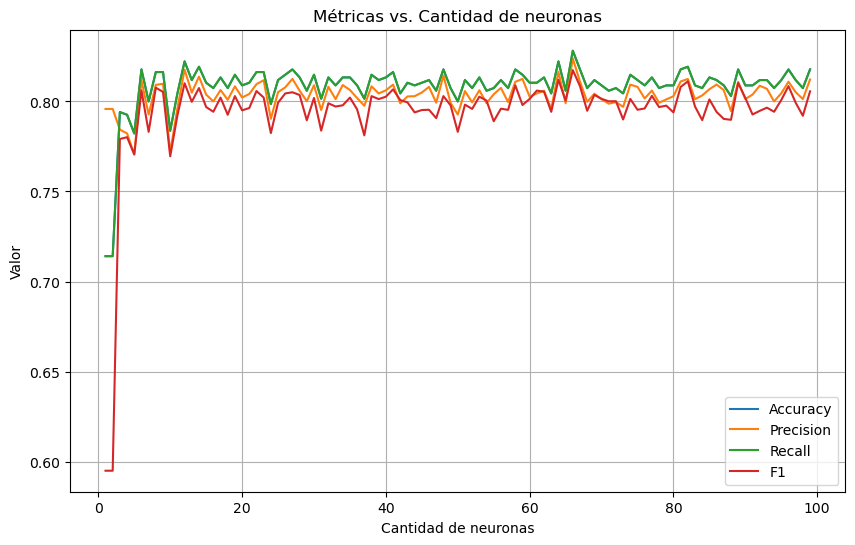

In [97]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

Max AUC
neu = 61 || AUC = 0.7476135703996732 || Precision = 0.8044456668465345 || Recall = 0.8103703703703704 || F1 = 0.8060127197904976 || Accuracy = 0.8103703703703704
Max Precision
neu = 66 || AUC = 0.742975082235074 || Precision = 0.8238668421771936 || Recall = 0.8281481481481482 || F1 = 0.8173682827766418 || Accuracy = 0.8281481481481482
Max Recall
neu = 66 || AUC = 0.742975082235074 || Precision = 0.8238668421771936 || Recall = 0.8281481481481482 || F1 = 0.8173682827766418 || Accuracy = 0.8281481481481482
Max F1
neu = 66 || AUC = 0.742975082235074 || Precision = 0.8238668421771936 || Recall = 0.8281481481481482 || F1 = 0.8173682827766418 || Accuracy = 0.8281481481481482
Max Accuracy
neu = 66 || AUC = 0.742975082235074 || Precision = 0.8238668421771936 || Recall = 0.8281481481481482 || F1 = 0.8173682827766418 || Accuracy = 0.8281481481481482


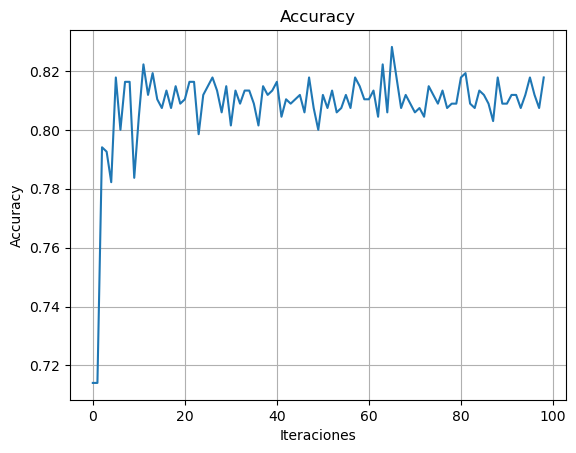

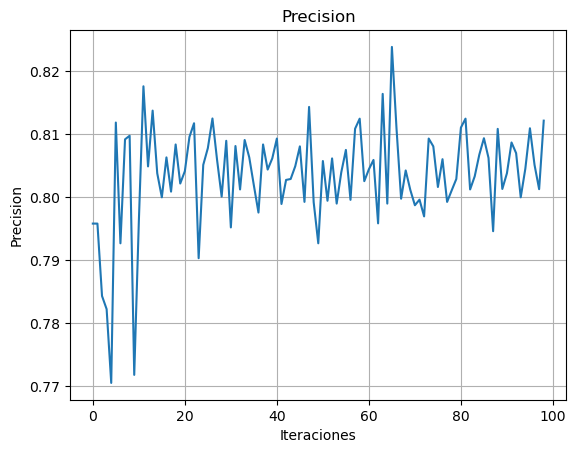

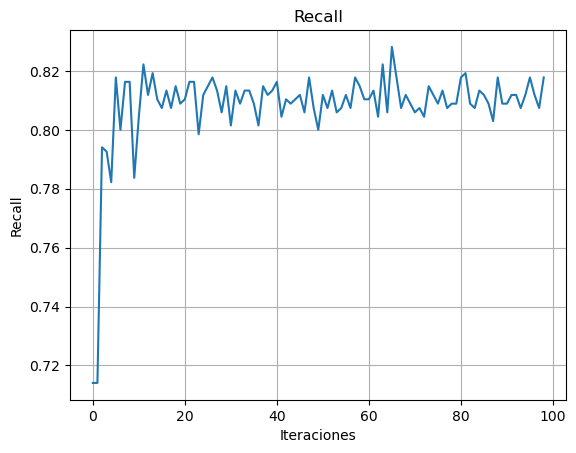

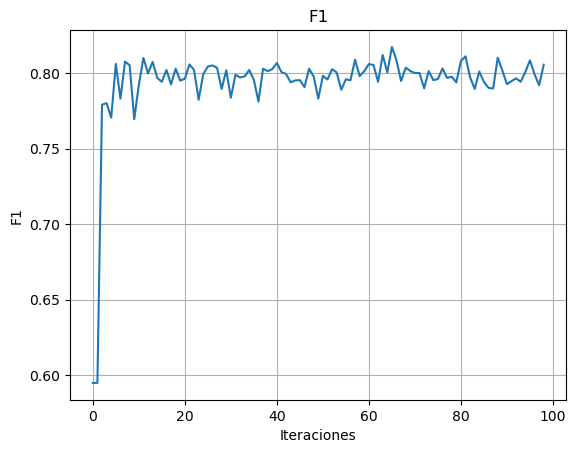

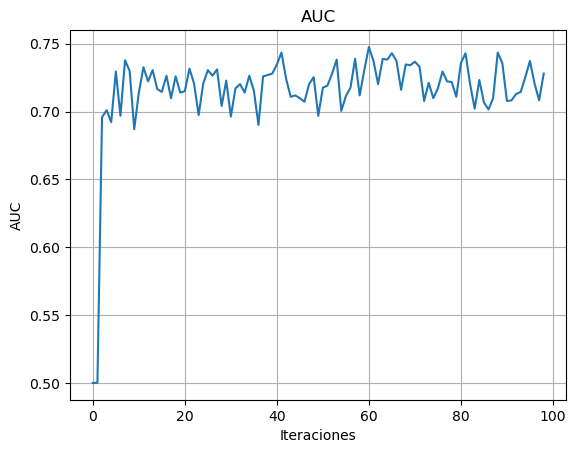

In [101]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Optimizer = sgd

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='relu',
        solver='sgd',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 6800, Redes = 1, Neuronas = 1-100 | Activation = Logistic

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='logistic',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Optimizer = sgd

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,),
        activation='logistic',
        solver='sgd',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 6800, Redes = 2, Neuronas = 1-100 | Activation = ReLu

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Optimizer = sgd

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='relu',
        solver='sgd',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 50000, Redes = 2, Neuronas = 1-100 | Activation = Logistic

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='logistic',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Optimizer = sgd

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,),
        activation='logistic',
        solver='sgd',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 50000, Redes = 3, Neuronas = 1-100 | Activation = ReLu

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i),
        activation='relu',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Optimizer = sgd

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i),
        activation='relu',
        solver='sgd',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

#### Epochs = 50000, Redes = 3, Neuronas = 1-100 | Activation = Logistic

##### Optimizer = adam

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i),
        activation='logistic',
        solver='adam',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)

##### Optimizer = sgd

In [ ]:
# Listas para almacenar las métricas
neuronas = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
roc_scores = []
lst = []
y_pred_list = []

# Iterar sobre el rango especificado
for i in range(1, 100):
    model = MLPClassifier(
        hidden_layer_sizes=(i,i,i),
        activation='logistic',
        solver='sgd',
        max_iter=6800,
        random_state=123
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_list.append((i, y_pred))

    # Calcular métricas
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    accuracy_nn = accuracy_score(y_test, y_pred)
    precision_nn = report['weighted avg']['precision']
    recall_nn = report['weighted avg']['recall']
    f1_nn = report['weighted avg']['f1-score']
    roc_nn = roc_curve(y_test, y_pred)
    auc_nn = roc_auc_score(y_test, y_pred)
    lst.append({"neu": i, "acc": accuracy_nn, "prec": precision_nn, "rec": recall_nn, "f1": f1_nn, "auc": auc_nn, "roc": roc_nn})

    # Almacenar las métricas en las listas
    neuronas.append(i)
    accuracy_scores.append(accuracy_nn)
    precision_scores.append(precision_nn)
    recall_scores.append(recall_nn)
    f1_scores.append(f1_nn)
    auc_scores.append(auc_nn)
    roc_scores.append(roc_nn)

    # Imprimir las métricas de cada iteración
    #print(f'Neuronas: {i}, Redes: 1')
    #print(f'Accuracy: {accuracy_nn:.2f}')
    #print(f'Precision: {precision:.2f}')
    #print(f'Recall: {recall:.2f}')
    #print(f'F1: {f1:.2f}')

# Graficar las métricas
plt.figure(figsize=(10, 6))
plt.plot(neuronas, accuracy_scores, label='Accuracy')
plt.plot(neuronas, precision_scores, label='Precision')
plt.plot(neuronas, recall_scores, label='Recall')
plt.plot(neuronas, f1_scores, label='F1')
plt.xlabel('Cantidad de neuronas')
plt.ylabel('Valor')
plt.title('Métricas vs. Cantidad de neuronas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print("Max AUC")
print(f"neu = {maxAuc['neu']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print("Max Precision")
print(f"neu = {maxPrec['neu']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print("Max Recall")
print(f"neu = {maxRec['neu']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print("Max F1")
print(f"neu = {maxF1['neu']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print("Max Accuracy")
print(f"neu = {maxAcc['neu']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)